In [1]:
import pandas as pd
import keras
import utils
from keras.models import model_from_yaml
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

%matplotlib inline

Using TensorFlow backend.
/usr/lib64/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
with open('result/model_bn.yml') as file_obj:
    model_yml = file_obj.read()

In [3]:
model = model_from_yaml(model_yml)

In [25]:
model.load_weights('result/model_bn.h5')

In [5]:
data_dir = r'./data'
trn = pd.read_csv('{}/air_visit_data.csv'.format(data_dir))
feas = utils.data2fea(trn, data_dir)
input_map = feas['x_map']
y = feas['y']
contin_cols = feas['contin_cols']
cat_map_fit = feas['cat_map_fit']
ts_date = feas['times']
s_i = ts_date[ts_date == '2016-04-23'].index[0]
e_i = ts_date[ts_date == '2016-06-01'].index[0]
# valid & trn splitting
map_train, map_valid, y_train_orig, y_valid_orig = utils.ts_data_split(input_map, y, s_i, e_i)
y_train, y_valid, max_log_y = utils.uniform_y(y_train_orig, y_valid_orig)

/home/ec2-user/ai/ml_utils/proj/RRVF/utils.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  store_info.drop_duplicates(inplace=True)
/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/ec2-user/ai/ml_utils/proj/RRVF/utils.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  hpg_store_info.drop('src', axis=1, inplace=True, errors="ignore")


In [26]:
pred_valid = model.predict(map_valid)
# pred_valid_orig = utils.log_max_inv(pred_valid, max_log_y/2)*2

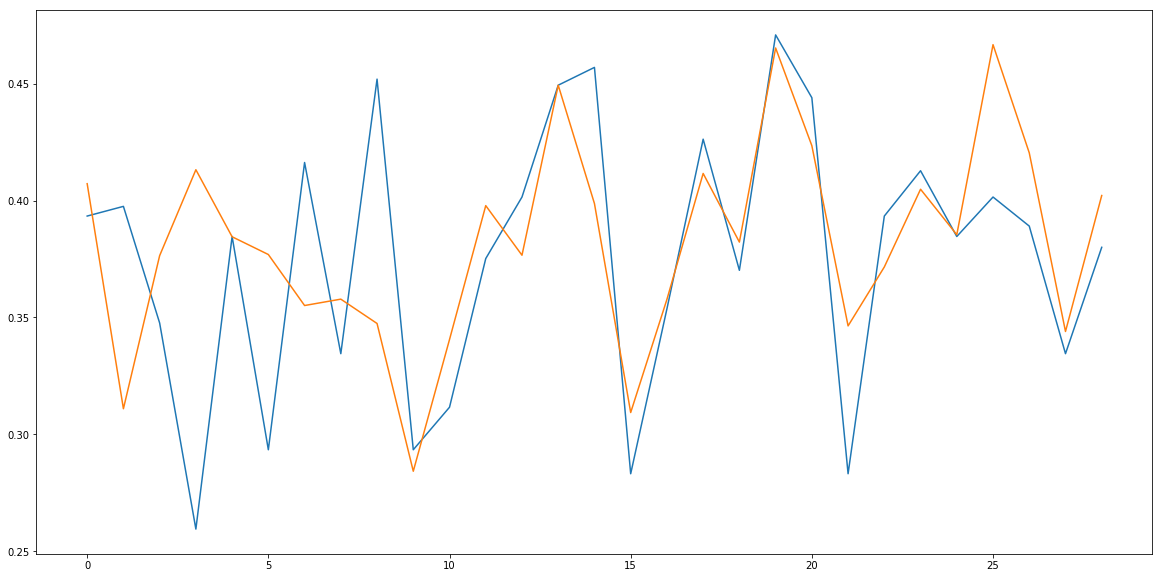

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(y_valid.values)
plt.plot(pred_valid.flatten())

In [28]:
pred_trn = model.predict(map_train)
pred_trn_orig = utils.log_max_inv(pred_trn, max_log_y)

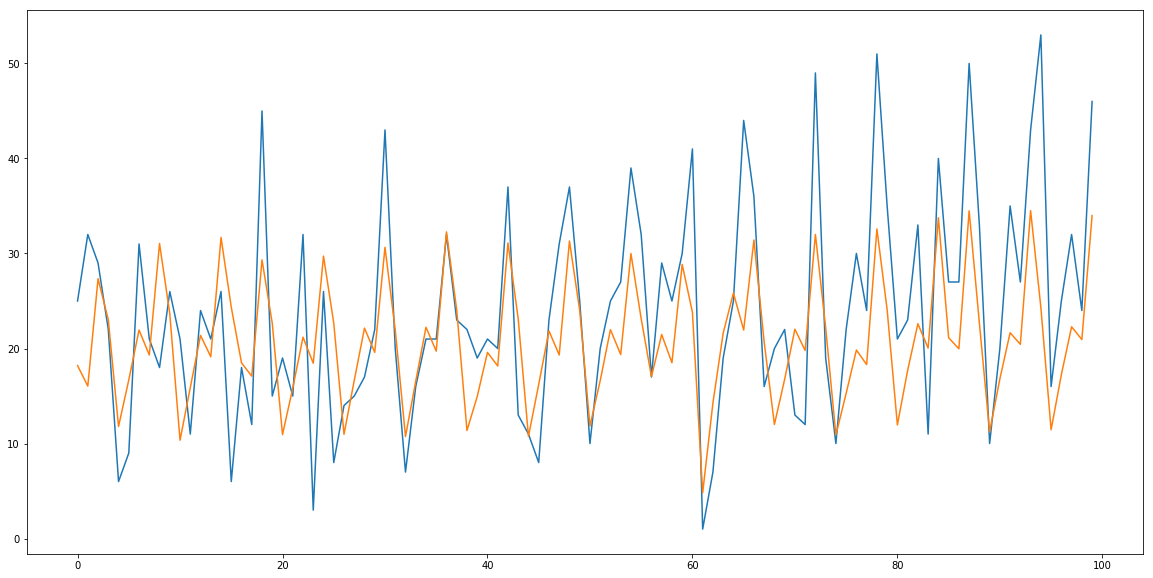

In [9]:

plt.figure(figsize=(20, 10))
plt.plot(y_train_orig[:100])
plt.plot(pred_trn_orig[:100].flatten())

(array([  2.51098000e+05,   9.31000000e+02,   3.30000000e+01,
          9.00000000e+00,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00]),
 array([   1. ,   88.6,  176.2,  263.8,  351.4,  439. ,  526.6,  614.2,
         701.8,  789.4,  877. ]),
 <a list of 10 Patch objects>)

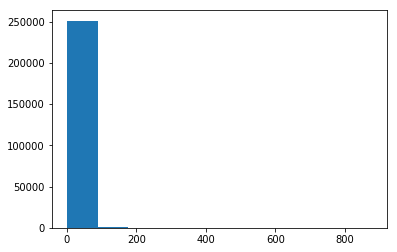

In [17]:
plt.hist(y_train_orig)

(array([  4.81100000e+03,   1.36420000e+04,   3.29410000e+04,
          6.41440000e+04,   7.52910000e+04,   5.37180000e+04,
          7.26700000e+03,   2.38000000e+02,   2.20000000e+01,
          5.00000000e+00]),
 array([ 0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,
         0.72,  0.8 ]),
 <a list of 10 Patch objects>)

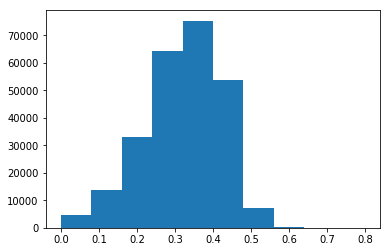

In [18]:
plt.hist(y_train)

(array([  1.73200000e+03,   1.83500000e+03,   4.14500000e+03,
          1.25570000e+04,   1.43593000e+05,   6.70450000e+04,
          1.77280000e+04,   3.21000000e+03,   2.08000000e+02,
          2.60000000e+01]),
 array([  7.62157072e-07,   6.63138991e-02,   1.32627036e-01,
          1.98940173e-01,   2.65253310e-01,   3.31566447e-01,
          3.97879584e-01,   4.64192720e-01,   5.30505857e-01,
          5.96818994e-01,   6.63132131e-01]),
 <a list of 10 Patch objects>)

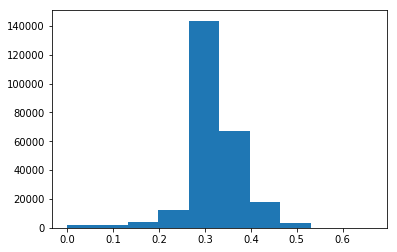

In [19]:
plt.hist(pred_trn)

# Submission

In [13]:
data_dir = r'./data'
test = pd.read_csv('{}/sample_submission.csv'.format(data_dir))
trn_like_test = utils.tes2trn(test)
trn_like_test = trn_like_test.assign(visitors = 0)
feas = utils.data2fea(trn_like_test, data_dir)
input_map = feas['x_map']
y = feas['y']

/home/ec2-user/ai/ml_utils/proj/RRVF/utils.py:358: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  store_info.drop_duplicates(inplace=True)
/usr/local/lib64/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/home/ec2-user/ai/ml_utils/proj/RRVF/utils.py:369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  hpg_store_info.drop('src', axis=1, inplace=True, errors="ignore")


In [21]:
pred_test = model.predict(input_map)
pred_test_orig = utils.log_max_inv(pred_test, max_log_y)
pred_test_orig[pred_test_orig>1000] = pred_test_orig[pred_test_orig<1000].mean()

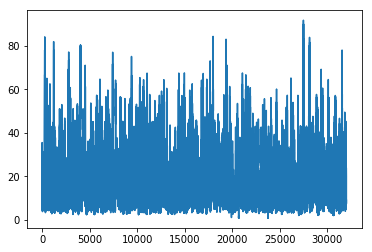

In [22]:
plt.plot(pred_test_orig)

In [23]:
test.visitors = pred_test_orig

In [24]:
test.to_csv('result/submission.csv', index=False)